# Análises

## Bibliotecas

In [177]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

## dataset

In [189]:
dados = pd.read_csv('dados/dados.csv')

## Início das análises

In [185]:
pd.set_option('display.max_columns', None)
dados.tail()

,data_completa,horario,tipo_de_ocorrencia,km,trecho,tipo_de_acidente,ilesos,levemente_feridos,moderadamente_feridos,gravemente_feridos,mortos,concessionaria,dia_da_semana,fase_do_dia,br,estado,veiculos
795534,2022-06-01,14:52:54,com vítima,"551,500",BR-40/MG,choque,0,1,0,0,0,via 040,qua,tarde,BR-40,MG,1
795535,2022-06-01,22:50:48,sem vítima,"611,500",BR-40/MG,tombamento,0,0,0,0,0,via 040,qua,noite,BR-40,MG,2
795536,2022-06-05,22:14:38,sem vítima,"35,150",BR-40/MG,atropelamento de animal,0,0,0,0,0,via 040,dom,noite,BR-40,MG,1
795537,2022-06-08,21:04:21,sem vítima,"83,500",BR-40/MG,capotamento,0,0,0,0,0,via 040,qua,noite,BR-40,MG,1
795538,2022-06-08,21:08:00,sem vítima,"583,400",BR-40/MG,acidentes de outra natureza,0,0,0,0,0,via 040,qua,noite,BR-40,MG,1


In [180]:
dados['data_completa'] = pd.to_datetime(dados['data_completa'],format='%Y-%m-%d')
dados['ano'] = dados['data_completa'].dt.year.astype(str)
dados['ano'].unique()

array(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'], dtype=object)

Registros de acidentes ocorridos em rodovias federais no ano de 2010 a 2022.

### Dias da semana em que mais ocorre acidentes

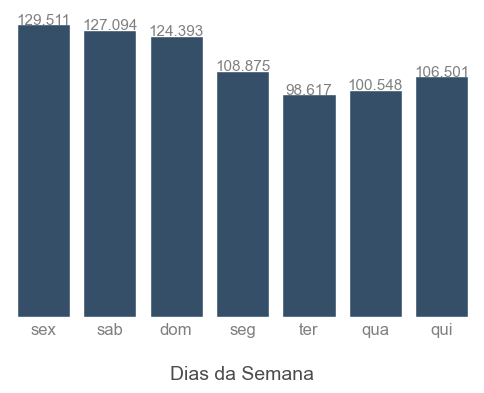

In [181]:
# criando a fig e o ax no matplotlib
fig, ax = plt.subplots(figsize=(6,4))

# criando o gráfico no seaborn
sns.countplot(dados['dia_da_semana'], ax=ax, palette=['#2b5070'])

# modificando o fundo
ax.set_frame_on(False)

# retirando o eixo Y
ax.get_yaxis().set_visible(False)

# retirando os ticks do eixo x
ax.tick_params(axis='x', length=0, labelsize=12, colors='grey')

# ajustando o titulo "dias da semana"
ax.set_xlabel('Dias da Semana', labelpad=20, fontdict={'fontsize':14}, color='#4c4c4c', loc='center')

# colocando os rótulos
for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
           retangulo.get_height() + 22,
           '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
           ha='center',
           fontsize=11,
           color='grey')

Sexta-feira é o dia que mais ocorre acidentes, seguido de sábado e domingo. Sendo terça-feira o dia que menos ocorre acidentes. 

### Fase do dia em que mais ocorre acidentes